In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### Let's change gears and talk about Game of thrones or shall I say Network of Thrones.

It is suprising right? What is the relationship between a fatansy TV show/novel and network science or python(it's not related to a dragon).

If you haven't heard of Game of Thrones, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books.



Andrew J. Beveridge, an associate professor of mathematics at Macalester College, and Jie Shan, an undergraduate created a network from the book A Storm of Swords by extracting relationships between characters to find out the most important characters in the book(or GoT).

The dataset is publicly avaiable for the 5 books at https://github.com/mathbeveridge/asoiaf. This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions.

Credits:

Blog: https://networkofthrones.wordpress.com

Math Horizons Article: https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf

##### Load the datasets

In [2]:
book1 = pd.read_csv('data/asoiaf-book1-edges.csv')
book2 = pd.read_csv('data/asoiaf-book2-edges.csv')
book3 = pd.read_csv('data/asoiaf-book3-edges.csv')
book4 = pd.read_csv('data/asoiaf-book4-edges.csv')
book5 = pd.read_csv('data/asoiaf-book5-edges.csv')

The resulting DataFrame book1 has 5 columns: Source, Target, Type, weight, and book. Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.

In [3]:
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


Once we have the data loaded as a pandas DataFrame, it's time to create a network. We create a graph for each book. It's possible to create one MultiGraph instead of 5 graphs, but it is easier to play with different graphs.

In [4]:
G_book1 = nx.Graph()
G_book2 = nx.Graph()
G_book3 = nx.Graph()
G_book4 = nx.Graph()
G_book5 = nx.Graph()

Let's populate the graph with edges from the pandas DataFrame.

In [5]:
for row in book1.iterrows():
    G_book1.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

In [6]:
for row in book2.iterrows():
    G_book2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book3.iterrows():
    G_book3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book4.iterrows():
    G_book4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book5.iterrows():
    G_book5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

In [7]:
books = [G_book1, G_book2, G_book3, G_book4, G_book5]

Let's have a look at these edges

In [8]:
list(G_book1.edges(data=True))[16]

('Jaime-Lannister', 'Loras-Tyrell', {'weight': 3, 'book': 1})

In [9]:
list(G_book1.edges(data=True))[400]

('Benjen-Stark', 'Theon-Greyjoy', {'weight': 4, 'book': 1})

### Finding the most important node i.e character in these networks.

Is it Jon Snow, Tyrion, Daenerys, or someone else? Let's see! Network Science offers us many different metrics to measure the importance of a node in a network as we saw in the first part of the tutorial. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.

First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter, where the follower-followee relationship forms the network, is an account which has a high number of followers. This measure of importance is called degree centrality.

Using this measure, let's extract the top ten important characters from the first book (book[0]) and the fifth book (book[4]).

In [10]:
deg_cen_book1 = nx.degree_centrality(books[0])

In [11]:
deg_cen_book5 = nx.degree_centrality(books[4])

In [12]:
sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

In [13]:
sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544),
 ('Cersei-Lannister', 0.08860759493670886),
 ('Barristan-Selmy', 0.07911392405063292),
 ('Hizdahr-zo-Loraq', 0.06962025316455696),
 ('Asha-Greyjoy', 0.056962025316455694),
 ('Melisandre', 0.05379746835443038)]

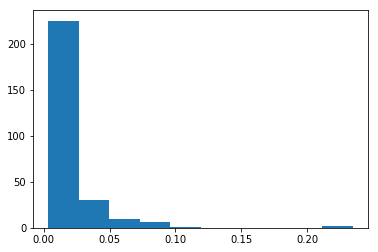

In [14]:
# Plot a histogram of degree centrality
plt.hist(list(nx.degree_centrality(G_book4).values()))
plt.show()

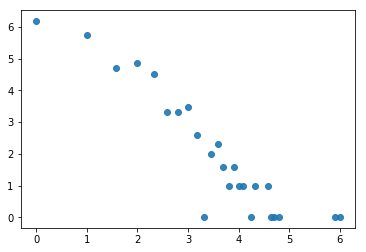

In [15]:
d = {}
for i, j in dict(nx.degree(G_book4)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

Create a new centrality measure, weighted_degree(Graph, weight) which takes in Graph and the weight attribute and returns a weighted degree dictionary. Weighted degree is calculated by summing the weight of the all edges of a node and find the top five characters according to this measure.

In [16]:
def weighted_degree(G, weight):
    result = dict()
    for node in G.nodes():
        weight_degree = 0
        for n in G.edges([node], data=True):
            weight_degree += n[2]['weight']
        result[node] = weight_degree
    return result

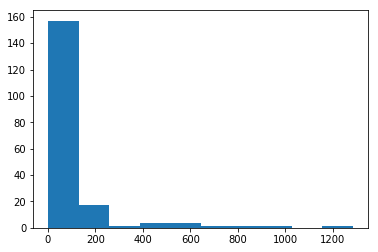

In [17]:
plt.hist(list(weighted_degree(G_book1, 'weight').values()))
plt.show()

In [18]:
sorted(weighted_degree(G_book1, 'weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 1284),
 ('Robert-Baratheon', 941),
 ('Jon-Snow', 784),
 ('Tyrion-Lannister', 650),
 ('Sansa-Stark', 545),
 ('Bran-Stark', 531),
 ('Catelyn-Stark', 520),
 ('Robb-Stark', 516),
 ('Daenerys-Targaryen', 443),
 ('Arya-Stark', 430)]

Let's do this for Betweeness centrality and check if this makes any difference

In [19]:
# First check unweighted, just the structure

sorted(nx.betweenness_centrality(G_book1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627),
 ('Daenerys-Targaryen', 0.08627015537511595),
 ('Robb-Stark', 0.07298399629664767),
 ('Drogo', 0.06481224290874964),
 ('Bran-Stark', 0.05579958811784442),
 ('Sansa-Stark', 0.03714483664326785)]

In [29]:
# Let's care about interactions now

sorted(nx.betweenness_centrality(G_book2, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Jaime-Lannister', 0.1720314977622008),
 ('Robert-Baratheon', 0.1569434521882266),
 ('Jon-Snow', 0.1533306704422441),
 ('Arya-Stark', 0.1368247670279162),
 ('Robb-Stark', 0.12885596466494134),
 ('Theon-Greyjoy', 0.11499641632661273),
 ('Stannis-Baratheon', 0.11446952689374187),
 ('Catelyn-Stark', 0.10955994658374536),
 ('Joffrey-Baratheon', 0.09911495273679691),
 ('Tyrion-Lannister', 0.09893402528458174)]

### PageRank
The billion dollar algorithm, PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

In [21]:

# by default weight attribute in pagerank is weight, so we use weight=None to find the unweighted results
sorted(nx.pagerank_numpy(G_book1, weight=None).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.04552079222830669),
 ('Tyrion-Lannister', 0.03301362462493264),
 ('Catelyn-Stark', 0.030193105286631945),
 ('Robert-Baratheon', 0.029834742227736747),
 ('Jon-Snow', 0.026834499522066176),
 ('Robb-Stark', 0.021562941297247503),
 ('Sansa-Stark', 0.02000803404286464),
 ('Bran-Stark', 0.01994578678623833),
 ('Jaime-Lannister', 0.0175078472028469),
 ('Cersei-Lannister', 0.017082604584758104)]

In [31]:
sorted(nx.pagerank_numpy(G_book3, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Jon-Snow', 0.03795734691218609),
 ('Tyrion-Lannister', 0.03641270869611655),
 ('Robb-Stark', 0.027925045350136426),
 ('Jaime-Lannister', 0.027519728622556677),
 ('Joffrey-Baratheon', 0.025883629706019595),
 ('Sansa-Stark', 0.025749257737573795),
 ('Daenerys-Targaryen', 0.022460548174968783),
 ('Samwell-Tarly', 0.019647965355099547),
 ('Arya-Stark', 0.019458777084914208),
 ('Catelyn-Stark', 0.01883289110470414)]

### Evolution of importance of characters over the books
According to degree centrality the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance changes over the course of five books, because you know stuff happens ;)

Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, Tyrion which showed up in the top 10 of degree centrality in first book.

We create a dataframe with character columns and index as books where every entry is the degree centrality of the character in that particular book and plot the evolution of degree centrality Eddard Stark, Jon Snow and Tyrion. We can see that the importance of Eddard Stark in the network dies off and with Jon Snow there is a drop in the fourth book but a sudden rise in the fifth book



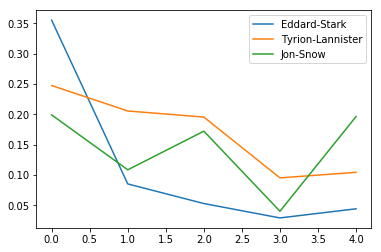

In [23]:
evol = [nx.degree_centrality(book) for book in books]
evol_df = pd.DataFrame.from_records(evol).fillna(0)
evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

In [24]:
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))
set_of_char

{'Arya-Stark',
 'Brienne-of-Tarth',
 'Catelyn-Stark',
 'Cersei-Lannister',
 'Daenerys-Targaryen',
 'Eddard-Stark',
 'Jaime-Lannister',
 'Joffrey-Baratheon',
 'Jon-Snow',
 'Margaery-Tyrell',
 'Robb-Stark',
 'Robert-Baratheon',
 'Sansa-Stark',
 'Stannis-Baratheon',
 'Theon-Greyjoy',
 'Tyrion-Lannister'}

Plot the evolution of weighted degree centrality of the above mentioned characters over the 5 books, and repeat the same exercise for betweenness centrality.

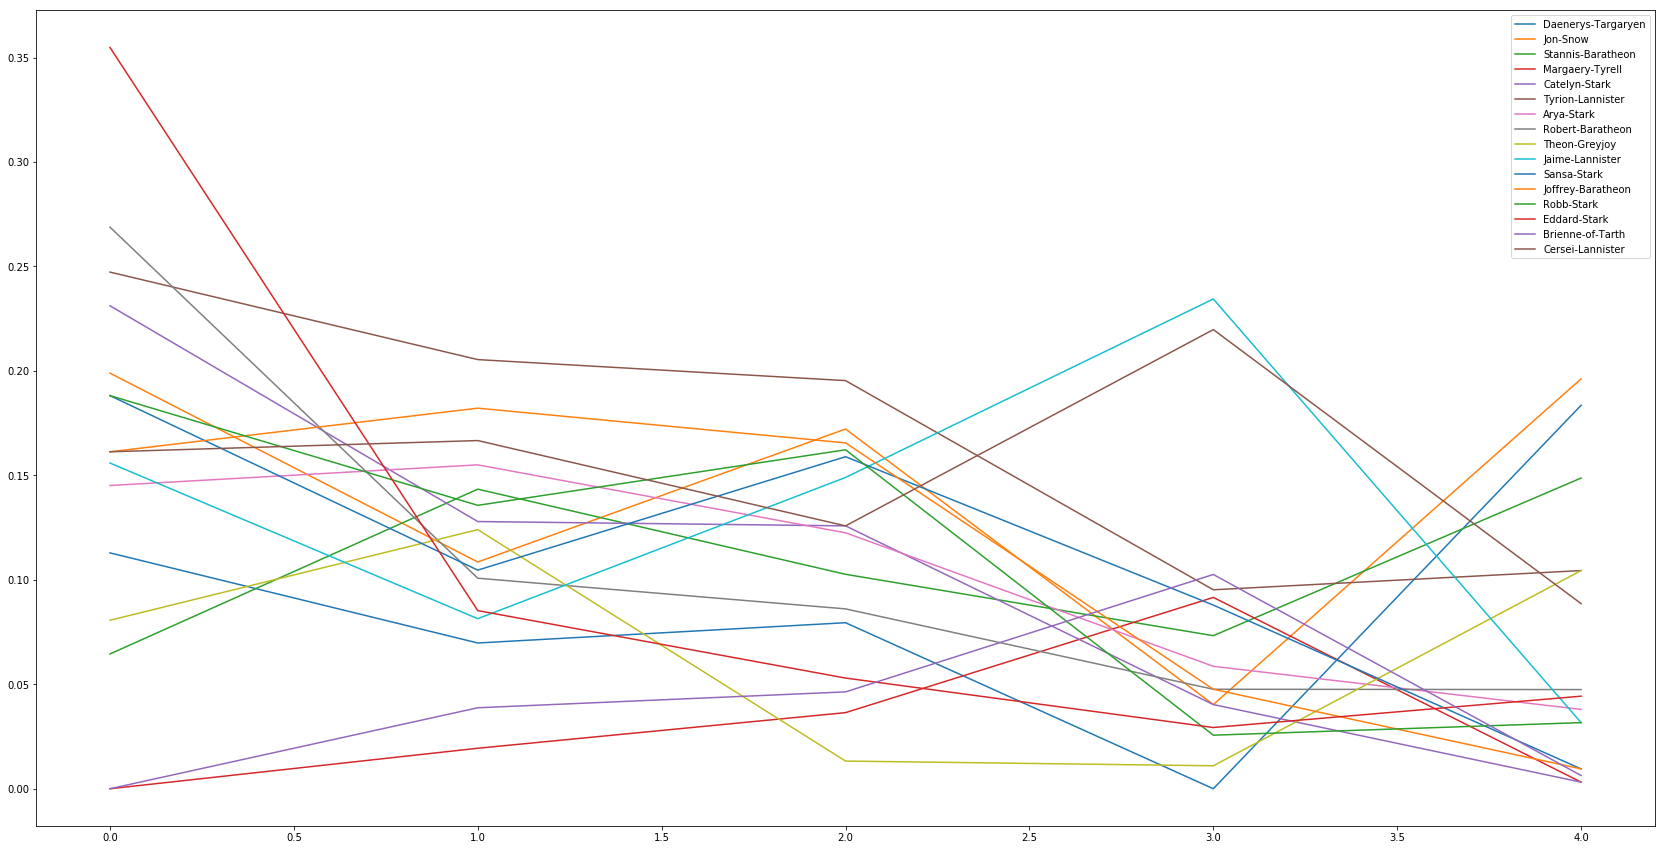

In [25]:
evol_df[list(set_of_char)].plot(figsize=(29,15))

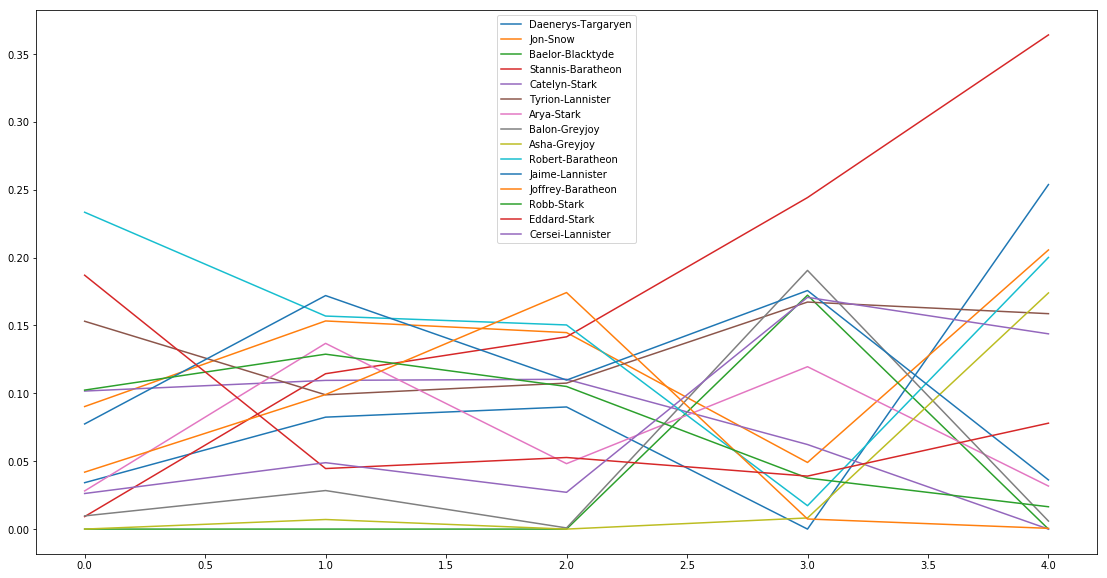

In [26]:
evol = [nx.betweenness_centrality(graph, weight='weight') for graph in [G_book1, G_book2, G_book3, G_book4, G_book5]]
evol_df = pd.DataFrame.from_records(evol).fillna(0)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))


evol_df[list(set_of_char)].plot(figsize=(19,10))

Lets take a more in depth look at Stannis Baratheon

In [27]:
sorted(nx.degree_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544)]

In [28]:
sorted(nx.betweenness_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

[('Stannis-Baratheon', 0.45283060689247934),
 ('Daenerys-Targaryen', 0.2959459062106149),
 ('Jon-Snow', 0.24484873673158666),
 ('Tyrion-Lannister', 0.20961613179551256),
 ('Robert-Baratheon', 0.17716906651536968)]

These slides/demos are based on concepts from: https://github.com/ericmjl/Network-Analysis-Made-Simple.